In [489]:
#@title 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interactive, widgets
from matplotlib.ticker import FormatStrFormatter


%matplotlib inline

In [497]:
#@title 
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

# Aula

## Resistência Mecânica dos Materiais

<span class="img_container center" style="display: block;"> <img alt="test" src="https://www.e-education.psu.edu/matse81/sites/www.e-education.psu.edu.matse81/files/Two_brittle_stress_strain.png" style="display:block; margin-left: auto; margin-right: auto;" title="caption" /> <span class="img_caption" style="display: block; text-align: center;"><b>Figura 1:</b> Ensaio de Flexão de Alumina e um vidro sodalime.</span> </span>

In [150]:
#@title 
def run_test(epsilon_i, E, sigma_f):
    if epsilon_i * E < sigma_f:
        epsilons = np.linspace(0, epsilon_i, 1000)
        sigmas = E*epsilons
    else:
        epsilons = np.linspace(0, epsilon_i, 1000)
        sigmas = E*epsilons
        sigmas[sigmas>sigma_f] = np.zeros(sigmas[sigmas>sigma_f].shape[0])
    return epsilons, sigmas

In [416]:
#@title 
m=3
E=400e9
sigma_0=220e6
sigma_f_1 = 220e6  # np.random.weibull(m, 1)*sigma_0

def f(epsilon_i):
    epsilons_1, sigmas_1 = run_test(epsilon_i, E, sigma_f_1)
    epsilon_max = sigma_f_1/E
    bar = np.array([0.09, 0.1, 0.11])
    plt.text(0.0925, 215, 'Amostra')
    plt.text(bar[0]*(1-epsilon_i*100)*0.9, 205, 'F')
    plt.text(bar[2]*(1+epsilon_i*100)*1.06, 205, 'F')

    plt.arrow(bar[0]*(1-epsilon_i*100), 200, -0.01, 0, head_width=10, head_length=0.005,
              fc='k', ec='k', zorder=4)
    plt.arrow(bar[2]*(1+epsilon_i*100), 200, 0.01, 0, head_width=10, head_length=0.005,
              fc='k', ec='k', zorder=4)
    if epsilon_i < epsilon_max:
        plt.plot([bar[0]*(1-epsilon_i*100), bar[1],
                  bar[2]*(1+epsilon_i*100)], [200, 200, 200], lw=10, c='k', label='Amostra')
    if epsilon_i >= epsilon_max:
        plt.plot([bar[0]*(1-epsilon_i*100),
                  bar[1]*(1-(epsilon_i-epsilon_max)*100)-0.0021], [200, 200], lw=10, c='k')
        plt.plot([bar[1]*(1+(epsilon_i-epsilon_max)*100)+0.0021,
                  bar[2]*(1+epsilon_i*100)], [200, 200], lw=10, c='k', label='Amostra')
    plt.plot(epsilons_1*100, sigmas_1*1e-6, c='Navy')
    plt.ylim(0, 300)
    plt.xlim(0, 0.14e-2*100)
    plt.ylabel('Tensão, $\sigma$ [MPa]')
    plt.xlabel('Deformação, $\epsilon$ [%]')
    plt.grid(lw=0.25)
#     plt.legend(borderpad=1.2)
    plt.show()

int_plot = interactive(f,
#                        epsilon_i=(0, 1e-4, 0.1e-5),
                         epsilon_i=widgets.FloatSlider(value=0,
                                                       min=0,
                                                       max=1e-3,
                                                       step=1e-5,
                                                       description='$\epsilon$',
                                                       readout_format='.2e',
                                                       orientation='horizontal')
                      )
output = int_plot.children[-1]
output.layout.height = '350px'
int_plot

interactive(children=(FloatSlider(value=0.0, description='$\\epsilon$', max=0.001, readout_format='.2e', step=…

## Distribuições Estatísticas

- Teoria das Probabilidades
- Variáveis Contínuas e Categóricas
- Funções de Densidade de Probabilidade (FDP) e Funções de Distribuição Acumuladas (FDA)
- Exemplos de modelos de distribuição de variáveis contínuas
    - Distribuição Normal
     <p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/800px-Normal_Distribution_PDF.svg.png?1597935607935" width="450" />
     </p>
    - Distribuição Logística
    <p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Logisticpdfunction.svg/640px-Logisticpdfunction.svg.png?1597935798039" width="450" />
     </p>
    - Distribuição de Pareto
    <p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Probability_density_function_of_Pareto_distribution.svg/640px-Probability_density_function_of_Pareto_distribution.svg.png?1597935618315" width="450" />
     </p>

    - Distribuição de Weibull
    <p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Weibull_PDF.svg/640px-Weibull_PDF.svg.png?1597935868233" width="450" />
     </p>
   
- Efeitos dos Parâmetros na distribuição de Weibull
- Weibull Plot

### A Distribuição de Weibull

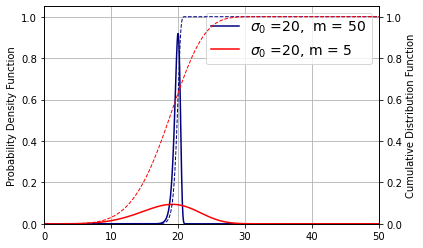

In [348]:
#@title 
sigma = np.linspace(0,50, 1000)
m = 15
sigma_0 = 20
weibull_pdf = lambda sigma, m, sigma_0: (m/sigma_0)*(sigma/sigma_0)**(m-1)*np.exp(-(sigma/sigma_0)**m)
weibull_cdf = lambda sigma, m, sigma_0: 1-np.exp(-(sigma/sigma_0)**m)

ax1 = plt.subplot()
ax2 = ax1.twinx()

ax1.plot(sigma, weibull_pdf(sigma, 50, 20), c='Navy', label='$\sigma_0$ =20,  m = 50')
ax2.plot(sigma, weibull_cdf(sigma, 50, 20), c='Navy', lw=1, ls='--')
ax1.plot(sigma, weibull_pdf(sigma, 5, 20), c='red', label='$\sigma_0$ =20, m = 5')
ax2.plot(sigma, weibull_cdf(sigma, 5, 20), c='red', lw=1, ls='--')

ax1.legend(fontsize=14)

ax1.set_ylabel('Probability Density Function')
ax2.set_ylabel('Cumulative Distribution Function')
for ax in [ax1, ax2]:
    ax.set_xlim(0,50)
    ax.set_ylim(0,1.05)

ax1.grid()

plt.show()
#

### Efeito dos Parâmetros na Distribuição

In [490]:
#@title 

m = 15
sigma_0 = 20
weibull_pdf = lambda sigma, m, sigma_0: (m/sigma_0)*(sigma/sigma_0)**(m-1)*np.exp(-(sigma/sigma_0)**m)
weibull_cdf = lambda sigma, m, sigma_0: 1-np.exp(-(sigma/sigma_0)**m)

def weibull_view(m, sigma_0):
    sigmas = np.linspace(0,50, 1000)
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4, 6))
    axs[0].plot(sigmas, weibull_pdf(sigmas, m, sigma_0), c='Navy', label=f'$\sigma_0$ = {sigma_0},  m = {m}')
    axs[0].set_xlim(0, 50)
    axs[0].set_ylim(0, 5)
    axs[0].set_xlabel('Tensão, $\sigma$ [MPa]')
    axs[0].set_ylabel('Função Densidade de Probabilidade (FDP)')
    axs[1].plot(sigmas, weibull_cdf(sigmas, m, sigma_0), c='Navy', label=f'$\sigma_0$ = {sigma_0},  m = {m}')
    axs[1].set_xlim(0, 50)
    axs[1].set_ylim(0, 1.25)
    axs[1].set_xlabel('Tensão, $\sigma$ [MPa]')
    axs[1].set_ylabel('Função de Distribuição Acumulada (FDA)')
    plt.tight_layout()
    
    for ax in axs:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.grid()
        ax.legend()
    plt.show()

int_plot = interactive(weibull_view,
                       sigma_0=widgets.FloatSlider(value=5,
                                                       min=5,
                                                       max=45,
                                                       step=1,
                                                       description='$\sigma_0$',
                                                       readout_format='.2f'),
                       m=widgets.FloatSlider(value=2,
                                                       min=2,
                                                       max=200,
                                                       step=5,
                                                       description='$m$',
                                                       readout_format='.2f')
                      )
output = int_plot.children[-1]
output.layout.height = '450px'
int_plot

interactive(children=(FloatSlider(value=2.0, description='$m$', max=200.0, min=2.0, step=5.0), FloatSlider(val…

In [ ]:
#@title 
from mpl_toolkits.axisartist.axislines import SubplotZero

fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

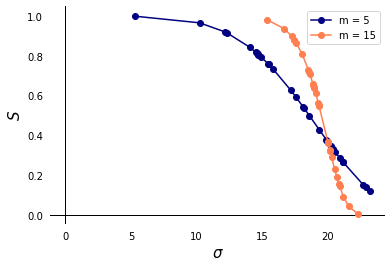

In [488]:
#@title 
plt.plot(sigmas_f_m5*1e-6, S_m5, '-o', c='navy', label='m = 5')
plt.plot(sigmas_f_m15*1e-6, S_m15, '-o', c='coral', label='m = 15')

plt.axhline(0, c='k', zorder=0, lw=1)
plt.axvline(0, c='k', zorder=0, lw=1)
plt.ylabel(r'$S$', fontsize=15)
plt.xlabel(r'$\sigma}{\sigma_0}}$', fontsize=15)

ax = plt.gca()
for side in ['top','right','bottom','left']:
    ax.spines[side].set_visible(False)
ax.tick_params(axis='both',which='both',labelbottom=True,bottom=False,left=False)
plt.legend()
plt.show()

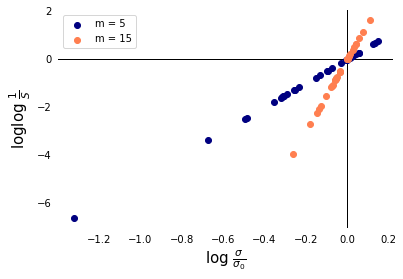

In [465]:
#@title 
weibull_pdf = lambda sigma, m, sigma_0: np.exp(-(sigma/sigma_0)**m)
sigma_0 = 20e6
sigmas_f_m5 = np.sort(np.random.weibull(5, 30)*sigma_0)
sigmas_f_m15 = np.sort(np.random.weibull(15, 30)*sigma_0)

S_m5 = weibull_pdf(sigmas_f_m5, 5, sigma_0)
S_m15 = weibull_pdf(sigmas_f_m15, 15, sigma_0)

plt.scatter(np.log(sigmas_f_m5 / sigma_0), np.log(np.log(1 / S_m5)), c='navy', label='m = 5')
plt.scatter(np.log(sigmas_f_m15 / sigma_0), np.log(np.log(1 / S_m15)), c='coral', label='m = 15')

plt.axhline(0, c='k', zorder=0, lw=1)
plt.axvline(0, c='k', zorder=0, lw=1)
plt.ylabel(r'$\log{\log{\ \frac{1}{S}}}$', fontsize=15)
plt.xlabel(r'$\log{\ \frac{\sigma}{\sigma_0}}$', fontsize=15)

ax = plt.gca()
for side in ['top','right','bottom','left']:
    ax.spines[side].set_visible(False)
ax.tick_params(axis='both',which='both',labelbottom=True,bottom=False,left=False)
plt.legend()
plt.show()

# Exercícios Simulando Ensaios Mecânicos

In [304]:
#@title 
m_1 = 3
E = 400e9
sigma_0 = 20e6
sigma_f_1_1 = np.random.weibull(m_1, 1)*sigma_0
sigma_f_1_2 = np.random.weibull(m_1, 1)*sigma_0
sigma_f_1_3 = np.random.weibull(m_1, 1)*sigma_0
sigma_f_1_4 = np.random.weibull(m_1, 1)*sigma_0
sigma_f_1_5 = np.random.weibull(m_1, 1)*sigma_0

def f_1(epsilon_i_per):
    epsilon_i = epsilon_i_per / 100
    epsilons_1, sigmas_1 = run_test(epsilon_i, E, sigma_f_1_1)
    epsilons_2, sigmas_2 = run_test(epsilon_i, E, sigma_f_1_2)
    epsilons_3, sigmas_3 = run_test(epsilon_i, E, sigma_f_1_3)
    epsilons_4, sigmas_4 = run_test(epsilon_i, E, sigma_f_1_4)
    epsilons_5, sigmas_5 = run_test(epsilon_i, E, sigma_f_1_5)

    plt.plot(epsilons_1*100, sigmas_1*1e-6, c='Navy', label='Amostra 1')
    plt.plot(epsilons_2*100, sigmas_2*1e-6, c='blue', label='Amostra 2')
    plt.plot(epsilons_3*100, sigmas_3*1e-6, c='orange', label='Amostra 3')
    plt.plot(epsilons_4*100, sigmas_4*1e-6, c='crimson', label='Amostra 4')
    plt.plot(epsilons_5*100, sigmas_5*1e-6, c='olive', label='Amostra 5')
    if epsilon_i * E >= sigma_f_1_1 and epsilon_i * E >= sigma_f_1_2 and epsilon_i * E >= sigma_f_1_3 and epsilon_i * E >= sigma_f_1_4 and epsilon_i * E >= sigma_f_1_5:
        ytable = plt.table(cellText=[['Amostra 1', round(sigma_f_1_1[0]*1e-6, 2)],
                                     ['Amostra 2', round(sigma_f_1_2[0]*1e-6, 2)],
                                     ['Amostra 3', round(sigma_f_1_3[0]*1e-6, 2)],
                                     ['Amostra 4', round(sigma_f_1_4[0]*1e-6, 2)],
                                     ['Amostra 5', round(sigma_f_1_5[0]*1e-6, 2)]],
                                     colLabels=['Amostras', 'Tensão de Falha, $\sigma_f$'],
                                     bbox=[-0.025, -1.2, 1.075, 0.875], cellLoc='center',
                              fontsize=18)
        ytable.auto_set_font_size(False)
        ytable.set_fontsize(16)
        ytable.scale(4, 2)
        
    plt.ylim(0, 40)
    plt.xlim(0, 0.125e-3*100)
    plt.ylabel('Tensão, $\sigma$ [MPa]')
    plt.xlabel('Deformação, $\epsilon$ [%]')
    plt.grid()
    plt.legend()
    plt.show()

int_plot_1 = interactive(f_1,
#                        epsilon_i=(0, 1e-4, 0.1e-5),
                         epsilon_i_per=widgets.FloatSlider(value=0,
                                                       min=0,
                                                       max=1e-2,
                                                       step=1e-4,
                                                       description='$\epsilon$',
                                                       readout_format='.2e')
                      )
output = int_plot_1.children[-1]
output.layout.height = '510px'
# int_plot_1

In [303]:
#@title 
m_2 = 15
E = 400e9
sigma_0 = 20e6
sigma_f_2_1 = np.random.weibull(m_2, 1)*sigma_0
sigma_f_2_2 = np.random.weibull(m_2, 1)*sigma_0
sigma_f_2_3 = np.random.weibull(m_2, 1)*sigma_0
sigma_f_2_4 = np.random.weibull(m_2, 1)*sigma_0
sigma_f_2_5 = np.random.weibull(m_2, 1)*sigma_0

def f_2(epsilon_i_per):
    epsilon_i = epsilon_i_per / 100
    epsilons_1, sigmas_1 = run_test(epsilon_i, E, sigma_f_2_1)
    epsilons_2, sigmas_2 = run_test(epsilon_i, E, sigma_f_2_2)
    epsilons_3, sigmas_3 = run_test(epsilon_i, E, sigma_f_2_3)
    epsilons_4, sigmas_4 = run_test(epsilon_i, E, sigma_f_2_4)
    epsilons_5, sigmas_5 = run_test(epsilon_i, E, sigma_f_2_5)

    plt.plot(epsilons_1*100, sigmas_1*1e-6, c='Navy', label='Amostra 1')
    plt.plot(epsilons_2*100, sigmas_2*1e-6, c='blue', label='Amostra 2')
    plt.plot(epsilons_3*100, sigmas_3*1e-6, c='orange', label='Amostra 3')
    plt.plot(epsilons_4*100, sigmas_4*1e-6, c='crimson', label='Amostra 4')
    plt.plot(epsilons_5*100, sigmas_5*1e-6, c='olive', label='Amostra 5')
    if epsilon_i * E >= sigma_f_2_1 and epsilon_i * E >= sigma_f_2_2 and epsilon_i * E >= sigma_f_2_3 and epsilon_i * E >= sigma_f_2_4 and epsilon_i * E >= sigma_f_2_5:
        ytable = plt.table(cellText=[['Amostra 1', round(sigma_f_2_1[0]*1e-6, 2)],
                                     ['Amostra 2', round(sigma_f_2_2[0]*1e-6, 2)],
                                     ['Amostra 3', round(sigma_f_2_3[0]*1e-6, 2)],
                                     ['Amostra 4', round(sigma_f_2_4[0]*1e-6, 2)],
                                     ['Amostra 5', round(sigma_f_2_5[0]*1e-6, 2)]],
                                     colLabels=['Amostras', 'Tensão de Falha, $\sigma_f$'],
                                     bbox=[-0.025, -1.2, 1.075, 0.875], cellLoc='center',
                              fontsize=18)
        ytable.auto_set_font_size(False)
        ytable.set_fontsize(16)
        ytable.scale(4, 2)
        
    plt.ylim(0, 40)
    plt.xlim(0, 0.125e-3*100)
    plt.ylabel('Tensão, $\sigma$ [MPa]')
    plt.xlabel('Deformação, $\epsilon$ [%]')
    plt.grid()
    plt.legend()
    plt.show()

int_plot_2 = interactive(f_2,
#                        epsilon_i=(0, 1e-4, 0.1e-5),
                         epsilon_i_per=widgets.FloatSlider(value=0,
                                                       min=0,
                                                       max=1e-2,
                                                       step=1e-4,
                                                       description='$\epsilon$',
                                                       readout_format='.2e')
                      )
output = int_plot_2.children[-1]
output.layout.height = '510px'
# int_plot_2

Lista de Exercícios :
Para a prática dos conceitos aprendidos, dispõe-se da seguinte lista de exercícios:

> 1. Realize os ensaios de tração para o Material 1 e o Material 2 (puxe o slider para a direita, ampliando a deformação - e consequentemente a tensão. **Importante: lembre-se que na realidade, ensaios de tração em materiais cerâmicos são inviáveis!**). Ao final do ensaio, será apresentado uma tabela com os valores de tensão de falha, $\sigma_f^{tr}$, de cada amostra. Calcule o valor de módulo de Weibull, $m$, para cada um dos materiais.

> 2. Quais parâmetros de processamento poderiam justificar a diferença entre o Material 1 e 2?

> 3. Com base nas relações discutidas em sala de aula, converta os resultados do ensaio de tração, $\sigma_f^{tr}$, para flexão três pontos, $\sigma_f^{3pt}$ e calcule as razões  $\frac{\sigma_f^{3pt}}{\sigma_f^{tr}}$. Em qual material a diferença é maior? Por que?

In [301]:
#@title 
tab1 = VBox(children=[int_plot_1])
tab2 = VBox(children=[int_plot_2])

tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Material 1')
tab.set_title(1, 'Material 2')
VBox(children=[tab])


In [424]:
slider = int_plot.children[0]
VBox([int_plot.children[-1], slider])